# Lets Grow More
**DATA SCIENCE INTERSHIP LGMVIP(OCT-2021)**</BR>

***AUTHOR:*** Vedic Yadav


***PROBLEM STATEMENT:***  Develop a neural network that can read handwriting.

Dataset Link: https://www.kaggle.com/oddrationale/mnist-in-csv

</BR>Here, We will be using the dataset given above to train a neural network using tensorflow by following the steps mentioned below: -</BR>
1. Loading the Dataset.
2. Normalization of Data.
3. Creating a feed forward Neural Network.
4. Evaluation of model on the test data.
5. Testing model on our handwritten digits.



# Loading the Dataset

In [ ]:
# Importing the necessary libraries 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import mnist

In [ ]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#shape of dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The dataset is setup in such a way that it contains 60,000 training data and 10,000 testing data.

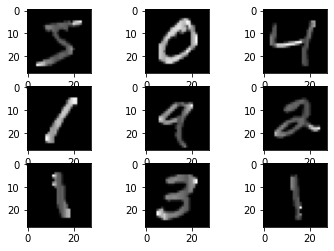

In [27]:
#plotting the dataset 

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Normalization of Data.
As the data is in greyscale we can normalize it between 0 and 1, otherwise we would be doing 0 to 255 for a RGB picture.

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

We won't be normalizing the y_train and y_test as it's just the labels for every picture containing a number from 0 to 9.

# Creating a feed forward Neural Network.




In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten (input_shape=(28,28))) #Input layer
model.add(tf.keras.layers.Dense(units=128, activation="relu")) #Hidden Layer 1
model.add(tf.keras.layers.Dense(units=128, activation="relu")) #Hidden Layer 2
model.add(tf.keras.layers.Dense(units=10, activation="softmax")) #output layer

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0677 - accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9940


By default the batch_size is 32, hence total training examples = 60,000/32 = 1875 batches.

# Evaluation of model on the test data.

In [ ]:
loss, acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1121 - accuracy: 0.9737


Now our model is trained and giving an accuracy of 97% classifying the digits it has never seen before.

# Testing model on our handwritten digits.

This number is: 2


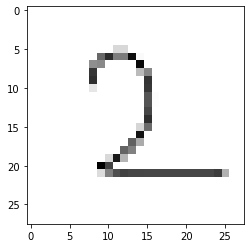

This number is: 3


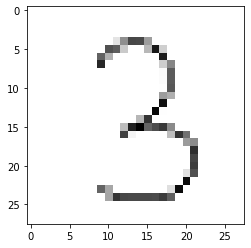

This number is: 7


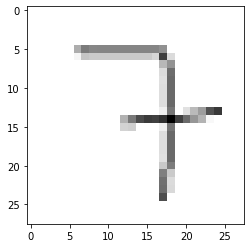

This number is: 8


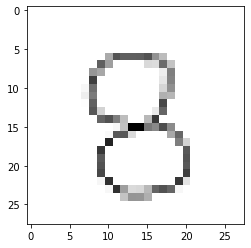

This number is: 9


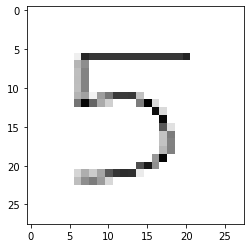

In [26]:
for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0] 
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This number is: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()